# 定义参数生成样本数据

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

num_epochs = 5
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes=2
echo_step=3
batch_size =5
num_batches = total_series_length//batch_size//truncated_backprop_length

def generateData():
    x = np.array(np.random.choice(2,total_series_length,p=[0.5,0.5]))
    y = np.roll(x,echo_step)
    y[0:echo_step] = 0
    x = x.reshape((batch_size,-1))
    y = y.reshape((batch_size,-1))
    
    return (x,y)

D:\Anaconda\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\envs\tf2\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or 

# 定义占位符处理输入数据

In [2]:
batchX_placeholder = tf.placeholder(tf.float32,[batch_size,truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32,[batch_size,truncated_backprop_length])
init_state = tf.placeholder(tf.float32,[batch_size,state_size])

#将batchX_Placeholder沿维度为1的轴方向进行拆分
inputs_series = tf.unstack(batchX_placeholder,axis=1)
                                                    #truncated_backprop_length个序列
labels_series = tf.unstack(batchY_placeholder,axis=1)

# 定义网络结构

In [3]:
current_state = init_state
predictions_series = []
losses = []
#使用一个循环，按照序列逐个输入
for current_input,labels in zip(inputs_series,labels_series):
    current_input = tf.reshape(current_input,[batch_size,1])
    #加入初始状态
    input_and_state_concatenated = tf.concat([current_input,current_state],1)
    next_state = tf.contrib.layers.fully_connected(input_and_state_concatenated,state_size,activation_fn=tf.tanh)
    current_state = next_state
    logits = tf.contrib.layers.fully_connected(next_state,num_classes,activation_fn=None)
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels,logits=logits)
    losses.append(loss)
    predictions = tf.nn.softmax(logits)
    predictions_series.append(predictions)
    
total_loss = tf.reduce_mean(losses)
train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)
    


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


# plot函数

In [4]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(batch_size):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        left_offset2 = range(echo_step,truncated_backprop_length+echo_step)
        
        label1 = "past values"
        label2 = "True echo values" 
        label3 = "Predictions"      
        plt.plot(left_offset2, batchX[batch_series_idx, :]*0.2+1.5, "o--b", label=label1)
        plt.plot(left_offset, batchY[batch_series_idx, :]*0.2+0.8,"x--b", label=label2)
        plt.plot(left_offset,  single_output_series*0.2+0.1 , "o--y", label=label3)
    
    plt.legend(loc='best')
    plt.draw()
    plt.pause(0.0001)

# 建立session训练数据

<Figure size 432x288 with 0 Axes>

New data, epoch 0
Step 0 Loss 0.73301214


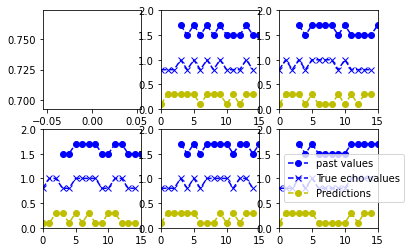

Step 100 Loss 0.5005712


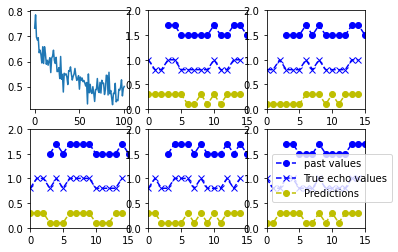

Step 200 Loss 0.3927882


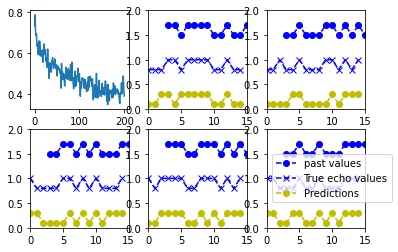

Step 300 Loss 0.31801182


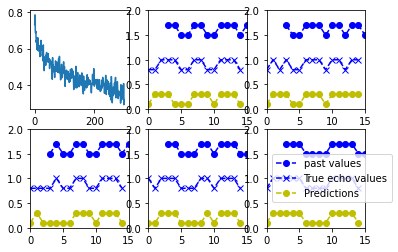

Step 400 Loss 0.28818196


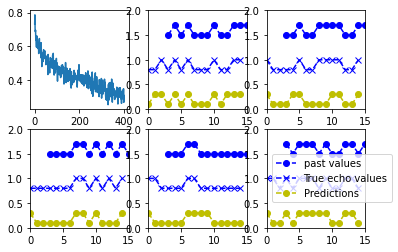

Step 500 Loss 0.29323968


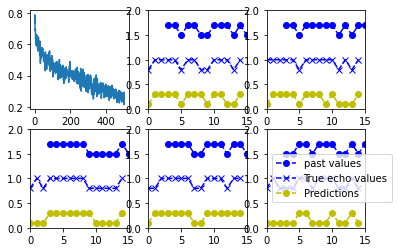

Step 600 Loss 0.24056607


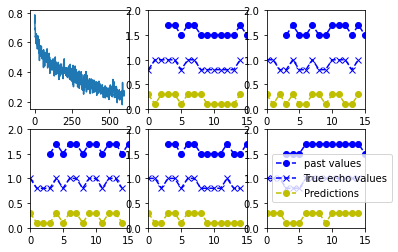

New data, epoch 1
Step 0 Loss 0.2905185


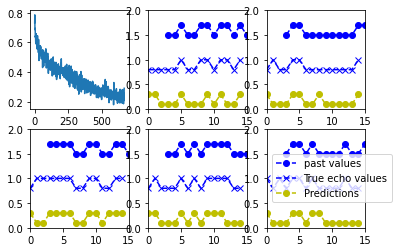

Step 100 Loss 0.23626015


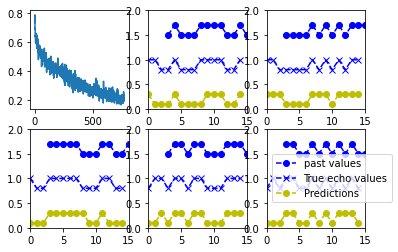

Step 200 Loss 0.2553401


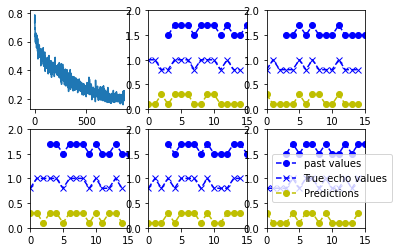

Step 300 Loss 0.21713275


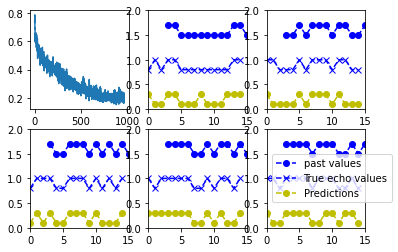

Step 400 Loss 0.20956217


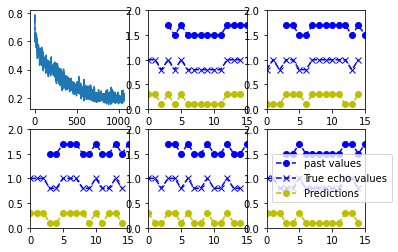

Step 500 Loss 0.21040918


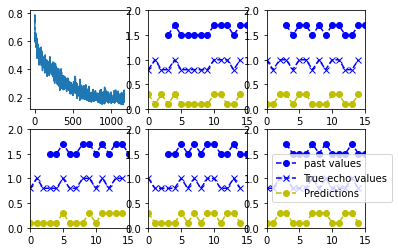

Step 600 Loss 0.22953394


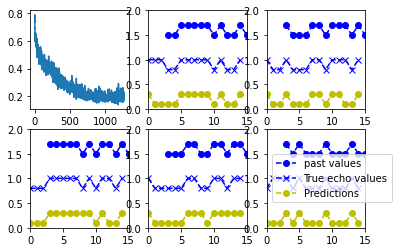

New data, epoch 2
Step 0 Loss 0.2586683


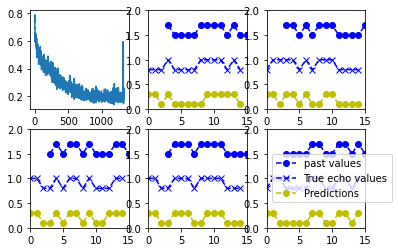

Step 100 Loss 0.19196625


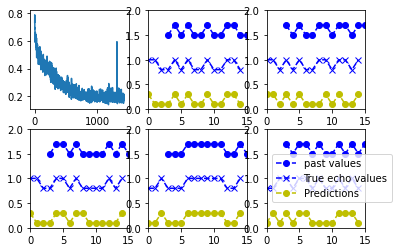

Step 200 Loss 0.16434054


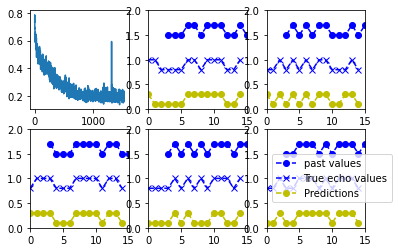

Step 300 Loss 0.18739228


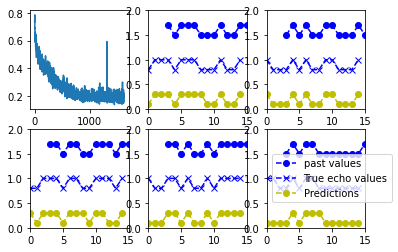

Step 400 Loss 0.17598523


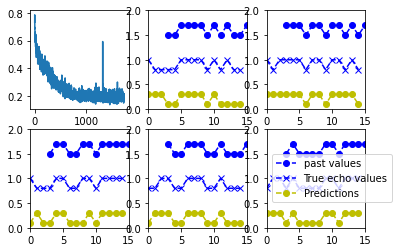

Step 500 Loss 0.1657148


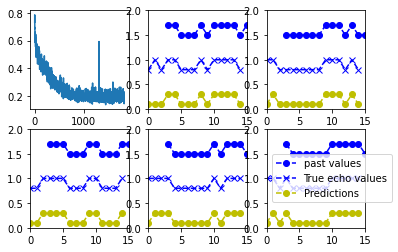

Step 600 Loss 0.21609469


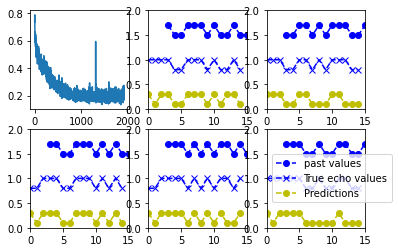

New data, epoch 3
Step 0 Loss 0.18954384


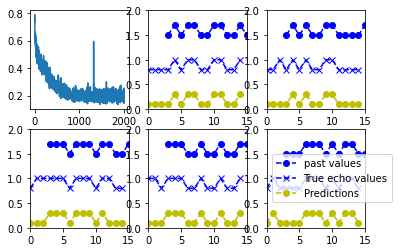

Step 100 Loss 0.16853997


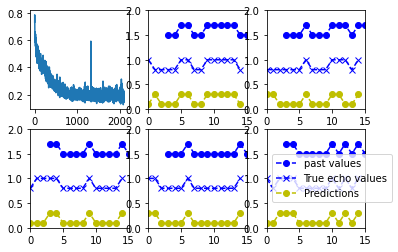

Step 200 Loss 0.24239486


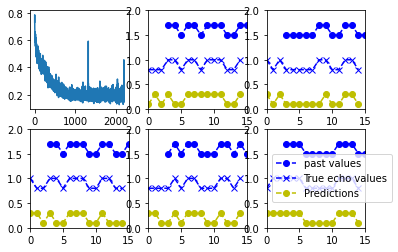

Step 300 Loss 0.18673159


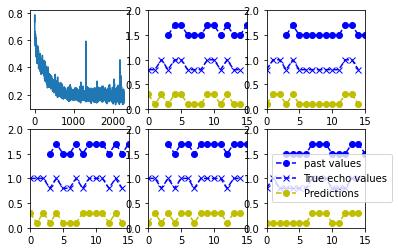

Step 400 Loss 0.15129247


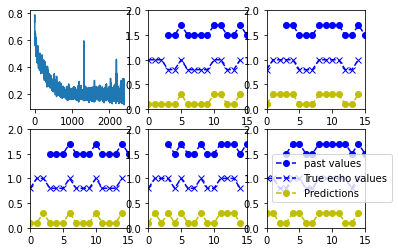

Step 500 Loss 0.18042384


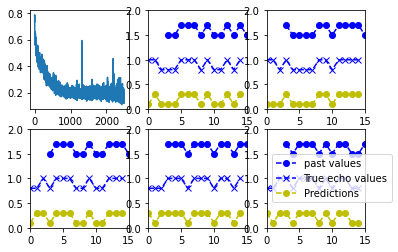

Step 600 Loss 0.12252477


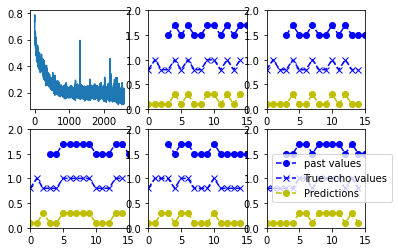

New data, epoch 4
Step 0 Loss 0.1826841


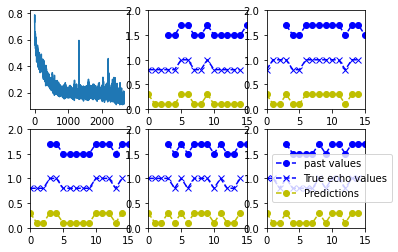

Step 100 Loss 0.16044448


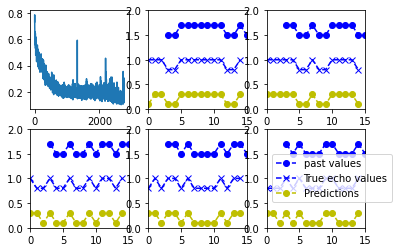

Step 200 Loss 0.10318236


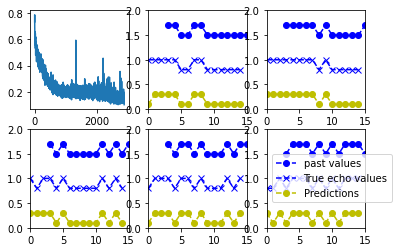

Step 300 Loss 0.12696408


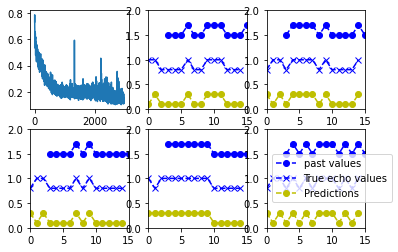

Step 400 Loss 0.13731453


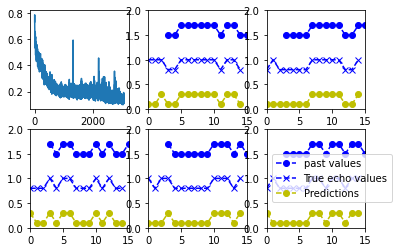

Step 500 Loss 0.14701717


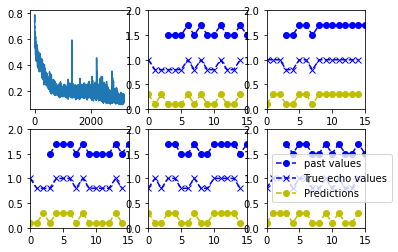

Step 600 Loss 0.13106191


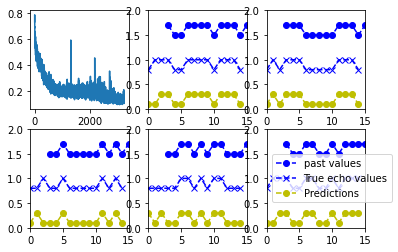

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):#50000/ 5 /15=分成多少段
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()  